# Part 0 — Data loading & preprocessing
- Load dataset with pandas
- Standardize features (required)
- Keep labels only for evaluation (external metrics)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
os.chdir("..")
sys.path.append(os.getcwd())

from src.utils.random import set_seed
from src.utils.preprocessing import StandardScaler


In [4]:
import os
os.chdir('..')
import sys
sys.path.append('.')


In [5]:
# Data loading (Breast Cancer Wisconsin Diagnostic)
# We avoid sklearn for loading; we use pandas to read the UCI dataset.
# If you're offline, download the CSV once and set LOCAL_CSV path.

UCI_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
LOCAL_CSV = None  # e.g. "data/wdbc.data"

cols = ["id", "diagnosis"] + [f"f{i}" for i in range(30)]
if LOCAL_CSV is None:
    df = pd.read_csv(UCI_URL, header=None, names=cols)
else:
    df = pd.read_csv(LOCAL_CSV, header=None, names=cols)

y = (df["diagnosis"].values == "M").astype(int)  # Malignant=1, Benign=0 (used ONLY for evaluation)
X = df.drop(columns=["id","diagnosis"]).values.astype(float)

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

print("X:", X.shape, "Xs:", Xs.shape, "Malignant%:", y.mean())


X: (569, 30) Xs: (569, 30) Malignant%: 0.37258347978910367


## Quick sanity plots

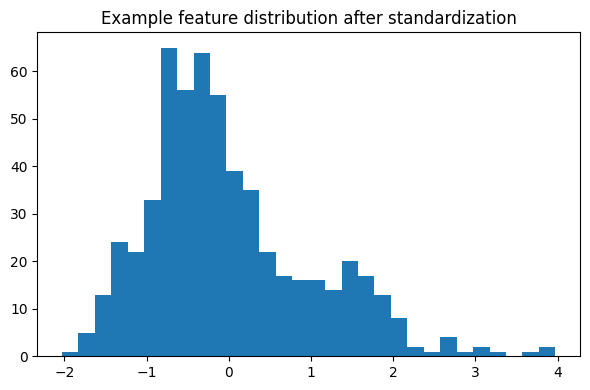

In [6]:
plt.figure(figsize=(6,4))
plt.hist(Xs[:,0], bins=30)
plt.title("Example feature distribution after standardization")
plt.tight_layout()
plt.show()
